## chisqr test 

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



import sys
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/')
from noshellavg import *
from run_error_analysis import *
from plot_chain import plot_single, plot_triple
from plot_error import *
%matplotlib inline

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


b and f : free parameters

Still different sky gives larger errors than combined estimator for test scales

cov_tot_keeped_matrix
[[  2.69798627e-06  -4.40127942e-06]
 [ -4.40127942e-06   1.24232960e-05]]


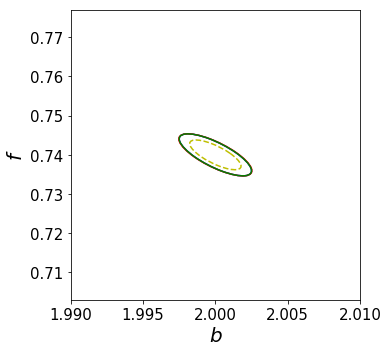

In [108]:
ellipse_file = 'data_txt/default_kN200_ke-3_rN180_re-3_bf_p02_s0_fisher_params_direct.txt'
plot_single_ellipse([ellipse_file], parameter_name = [r'$b$', r'$f$']\
                 , parameter_truth = [2.0, 0.74]\
                 , extent =[[0.995, 1.005], [0.95, 1.05]]\
                 , diffsky = 1
                 , linecolor = ['b', 'r', 'g', 'y' ,'b', 'r', 'g', 'y', 'c', 'k']
                 , linestyle = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid']
                
                 , text_label = '', out_name = 'figure/ellipse_sanchez_bfsn_fn.png')


[ 259312.8407998    73114.6958033    73114.6958033    40364.88082808]
[ 153886.23775965   45889.02708378   45889.02708378   34182.48860381]
cov_tot_keeped_matrix
[[  1.56171718e-05  -2.76987502e-05]
 [ -2.76987502e-05   9.38284282e-05]]


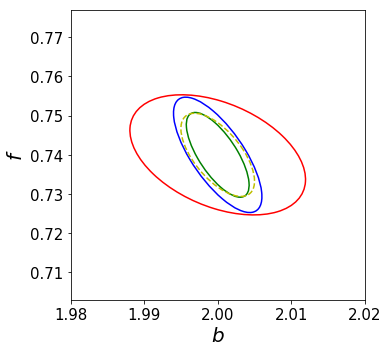

In [30]:
ellipse_file = 'data_txt/test_bf_k0_02_kN200_r18_180_rN162_p02_fisher_params_nn.txt'
plot_single_ellipse([ellipse_file], parameter_name = [r'$b$', r'$f$']\
                 , parameter_truth = [2.0, 0.74]\
                 , extent =[[0.99, 1.01], [0.95, 1.05]]\
                 , diffsky = 1
                 , linecolor = ['b', 'r', 'g', 'y' ,'b', 'r', 'g', 'y', 'c', 'k']
                 , linestyle = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid']
                
                 , text_label = '', out_name = 'figure/test.png')


If there is no finger of god term...

s = 0

Theoretically (or numerically), combined eistomator should give larger error than different sky case.

cov_tot_keeped_matrix
[[  1.53499265e-05  -2.68465373e-05]
 [ -2.68465373e-05   8.72090334e-05]]


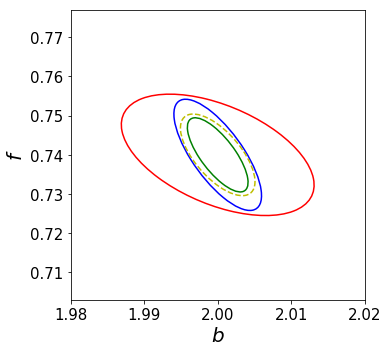

In [60]:
ellipse_file = 'data_txt/test_bf_k0_02_kN200_r18_180_rN162_p02_s0_fisher_params_direct.txt'
plot_single_ellipse([ellipse_file], parameter_name = [r'$b$', r'$f$']\
                 , parameter_truth = [2.0, 0.74]\
                 , extent =[[0.99, 1.01], [0.95, 1.05]]\
                 , diffsky = 1
                 , linecolor = ['b', 'r', 'g', 'y' ,'b', 'r', 'g', 'y', 'c', 'k']
                 , linestyle = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid']
                
                 , text_label = '', out_name = 'figure/test.png')


               b_p     f_p     b_xi     f_xi     combined(b/f)    diff(b/f)  
--------------------------------------------------------------------------------
full          1.643    3.525    -       -       1.642   3.525   1.167   2.495
full          -        -       1.658    3.531   1.642   3.525
--------------------------------------------------------------------------------
full(avg)     1.643    3.525    -       -       1.636   3.522   1.167   2.494
full(avg)     -        -       1.658    3.529   1.636   3.522
--------------------------------------------------------------------------------
test          3.918    9.339    -       -       2.714   6.227   3.333   6.852
test          -        -       8.619    10.191   2.714   6.227
--------------------------------------------------------------------------------
test(avg)     3.930    9.369    -       -       2.716   6.207   3.340   6.862
test(avg)     -        -       8.598    10.181   2.716   6.207
------------------------------------

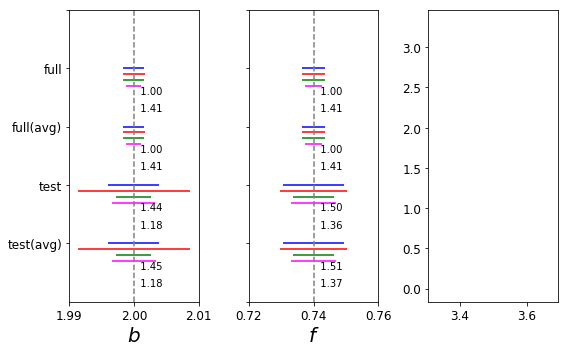

In [115]:
ellipse_file_full = 'data_txt/default_kN200_ke-3_rN180_re-3_bf_p02_s0_fisher_params_direct.txt'
ellipse_file_full_shellavg = 'data_txt/default_kN200_ke-3_rN180_re-3_bf_p02_s0_shellavg_fisher_params_direct.txt'
ellipse_file_test = 'data_txt/test_bf_k0_02_kN200_r18_180_rN162_p02_s0_fisher_params_direct.txt'
ellipse_file_shellavg = 'data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_s0_shellavg_fisher_params_direct.txt'
plot_errbar(filename = [ellipse_file_full, ellipse_file_full_shellavg, ellipse_file_test, ellipse_file_shellavg], 
            labels = ['full','full(avg)', 'test', 'test(avg)'], out_name='test_errbar.png' ,
            params_names = [r'$b$', r'$f$', ''], truth = [2, 0.74, 3.5], nn = False)

In [41]:
mu, dmu = np.linspace(-1, 1, 2**6+1, retstep = True)
b = 2
f = 0.74

In [52]:
def RRFirst(l1, l2):
    int_for = (b + f*mu**2)**4 * Ll(l1,mu)* Ll(l2,mu)
    return (2*l1+1)*(2*l2+1)/4.*romberg( int_for, dx=dmu, axis=0 )
def RRSecond(l1, l2):
    int_for = (b + f*mu**2)**2 * Ll(l1,mu)* Ll(l2,mu)
    return (2*l1+1)*(2*l2+1)/4.*romberg( int_for, dx=dmu, axis=0 )

In [55]:
print RRFirst(0, 0), RRFirst(0, 2), RRFirst(0, 4), RRFirst(2, 2), RRFirst(2, 4), RRFirst(4,4) 
print RRSecond(0, 0), RRSecond(0, 2), RRSecond(0, 4), RRSecond(2, 2), RRSecond(2, 4), RRSecond(4,4) 

13.509122447 12.4807389414 2.05753002965 88.3145679079 34.9725954756 153.925884049
2.54809333333 1.14312380952 0.0625828571429 14.4629047619 3.02073766234 25.6962321279


In [116]:
_, PF, XF, ComF = np.genfromtxt('data_txt/test_b_k0_02_kN200_r18_180_rN162_p0_s0_fisher_params_direct.txt')
_, PF2, XF2, ComF2 = np.genfromtxt('data_txt/test_b_k0_02_kN200_r18_180_rN162_p0_s0_shellavg_fisher_params_direct.txt')

In [117]:
Perr = 1./np.sqrt(PF)
Xerr = 1./np.sqrt(XF)
Comerr = 1./np.sqrt(ComF)
Differr = 1./np.sqrt(PF + XF)

Perr2 = 1./np.sqrt(PF2)
Xerr2 = 1./np.sqrt(XF2)
Comerr2 = 1./np.sqrt(ComF2)
Differr2 = 1./np.sqrt(PF2 + XF2)

In [127]:
print 'p  ', Perr, Perr2
print 'xi ', Xerr, Xerr2
print 'com', Comerr, Comerr2
print 'dif', Differr, Differr2

p   0.00271222655015 0.00271222655015
xi  0.00772842632742 0.0077229244223
com 0.00183868288656 0.00185549082429
dif 0.00255920539875 0.00255900542713


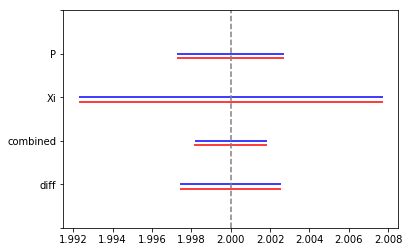

In [124]:
fig, ax = plt.subplots()
ax.errorbar( 2.0, 4, xerr = Perr, color='b')
ax.errorbar( 2.0, 3.9, xerr = Perr2, color='r')

ax.errorbar( 2.0, 3, xerr = Xerr, color='b')
ax.errorbar( 2.0, 2.9, xerr = Xerr2, color = 'r')

ax.errorbar( 2.0, 2, xerr = Comerr, color='b')
ax.errorbar( 2.0, 1.9, xerr = Comerr2, color='r')

ax.errorbar( 2.0, 1, xerr = Differr, color='b')
ax.errorbar( 2.0, 0.9, xerr = Differr2, color='r')

ax.axvline(x=2.0, color = 'grey', linestyle = '--')
ax.set_yticks([5,4,3,2,1, 0])
ax.set_yticklabels(['', 'P', 'Xi', 'combined', 'diff', ''])